# Seaborn
- matplotlib을 기반으로 다양한 테마와 그래프를 제공하는 파이썬 시각화 패키지.-
- http://seaborn.pydata.org/
    - 공식 사이트의 [gallary](http://seaborn.pydata.org/examples/index.html)에 제공하는 다양한 그래프와 예제를 확인 할 수 있다.
- 설치: 아나콘다에는 포함되있다.
```
pip install seaborn
conda install seaborn
```
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [4]:
# tips = pd.read_csv('data/tips.csv')
tips = sns.load_dataset('tips')
tips.shape

(244, 7)

## rugplot, kdeplot, distplot
- 1차원 연속형 값들의 분포를 시각화 하는 그래프

### rugplot 
- 각 데이터들의 위치를 보여준다.

In [5]:
tips['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

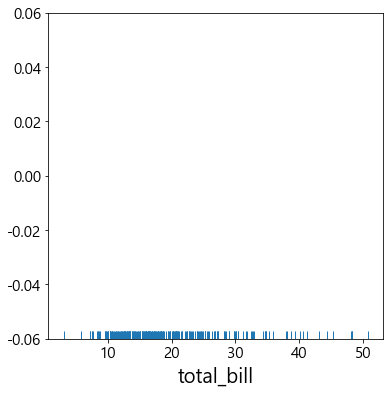

In [11]:
plt.figure(figsize=(6,6))
sns.rugplot(tips['total_bill'])
plt.show()

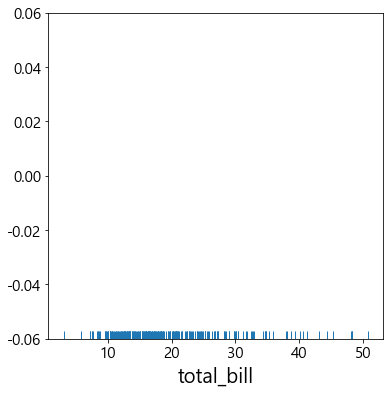

In [12]:
plt.figure(figsize=(6,6))
sns.rugplot("total_bill", data=tips)
plt.show()
#컬럼명: 문자열
#data: DataFrame객체

### kdeplot
- 히스토그램을 부드러운 곡선 형태로 표현한다. 
- KDE(Kernel Density Estimation) : 확률밀도추정

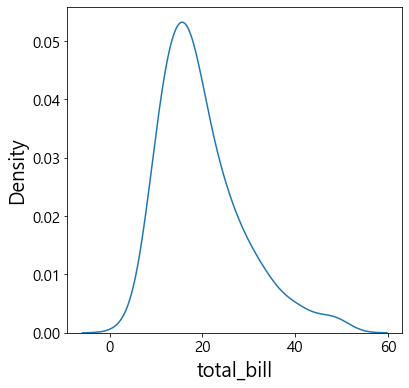

In [15]:
plt.figure(figsize=(6,6))
# sns.kdeplot(tips['total_bill'])
sns.kdeplot('total_bill', data=tips)
plt.show()

### distplot
- 히스토그램에 kdeplot, rugplot 한번에 그린다.
    - kdeplot은 default로 나오고 rugplot은 default로 안나온다.

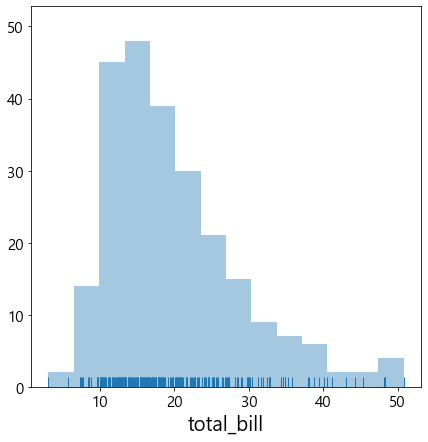

In [43]:
import warnings
warnings.filterwarnings(action='ignore')

plt.figure(figsize=(7,7))
# sns.distplot(tips['total_bill'])
sns.distplot(tips['total_bill'], 
            hist=True,
            kde=False,
            rug=True)
plt.show()
#distplot은 dataframe과 컬럼을 나눠서 지정 못함.

## boxplot(), violinplot(), swamplot()
- 연속형 데이터(양적데이터)들의 분포를 확인하는 그래프를 그린다.
- 범주별로 연속형 데이터의 분포를 비교할 수 있다.

### boxplot

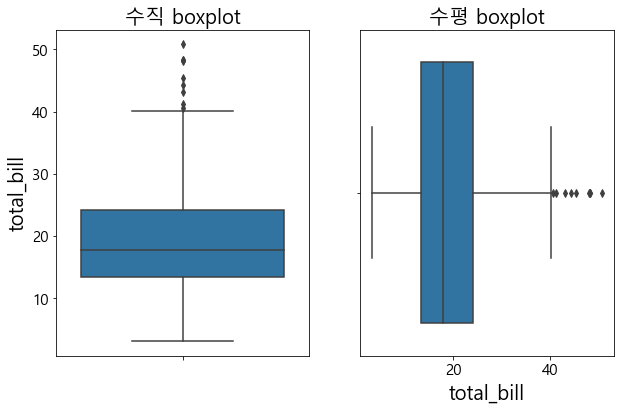

In [25]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(y=tips['total_bill']) 
plt.title('수직 boxplot')

plt.subplot(1,2,2)
sns.boxplot(x="total_bill", data=tips)
plt.title('수평 boxplot')

plt.show()

In [31]:
yes = tips[tips['smoker']=='Yes']['total_bill']
no = tips[tips['smoker']=='No']['total_bill']


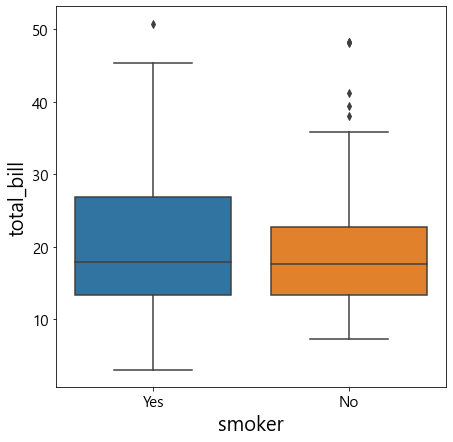

In [33]:
plt.figure(figsize=(7,7))

sns.boxplot(y='total_bill', x='smoker', data=tips)

# x(y)축: 분포를 보려는 연속형 값의 컬럼, y(x)축: 그룹을 나누려는 범주형 컬럼
plt.show()

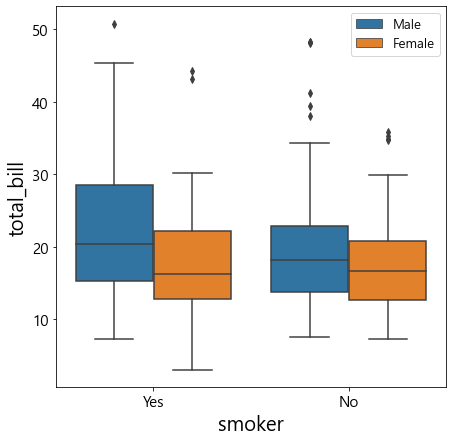

In [38]:
plt.figure(figsize=(7,7))

sns.boxplot(y='total_bill', x='smoker', hue='sex', data=tips)
plt.legend(fontsize=13)
# x(y)축: 분포를 보려는 연속형 값의 컬럼, y(x)축: 그룹을 나누려는 범주형 컬럼
plt.show()

### violin plot
- boxplot 위에 분포 밀도(kernel density)를 좌우 대칭으로 덮어쓰는 방식으로 데이터의 분포를 표현하므로 boxplot 보다 좀더 정확한 데이터의 분포를 볼 수 있다.
- 매개변수는 boxplot과 동일

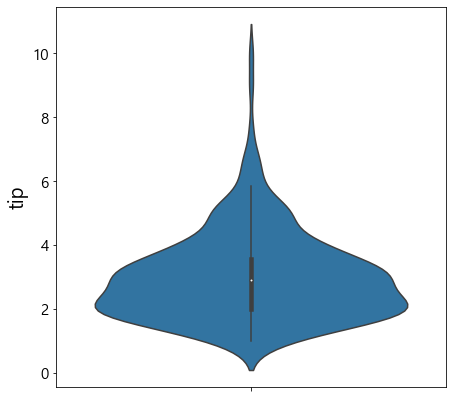

In [44]:
plt.figure(figsize=(7,7))
sns.violinplot(y='tip', data=tips)
plt.show()

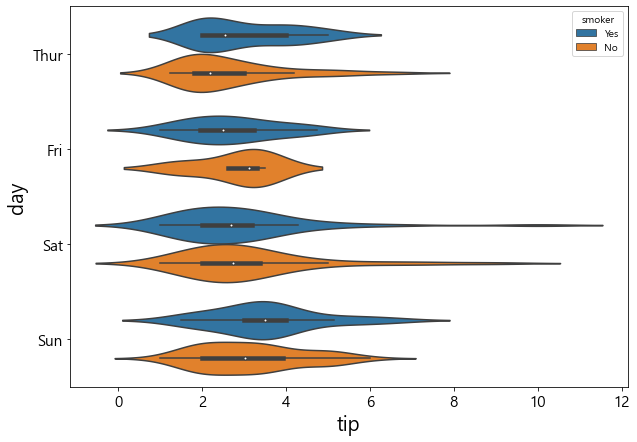

In [47]:
# 요일(day)별 팁의 분포
plt.figure(figsize=(10,7))
# sns.violinplot(y='tip', x='day', data=tips)
# sns.violinplot(y='tip', x='day', hue='smoker', data=tips)  #요일-흡연여부
sns.violinplot(x='tip', y='day', hue='smoker', data=tips)
plt.show()

### swarmplot
- 실제 값들을 점으로 찍어 준다. 
- boxplot이나 violin plot의 보안해주는 역할로 쓰인다.
- swarmplot은 가운데 분류를 기준으로 분포시키는데 실제 값이 있는 위치에 점을 찍으므로 좀더 정확하게 값이 어디에 있는지 알 수 있다.

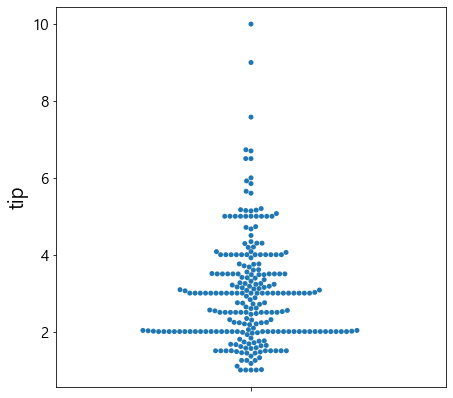

In [48]:
plt.figure(figsize=(7,7))
sns.swarmplot(y='tip', data=tips)
plt.show()

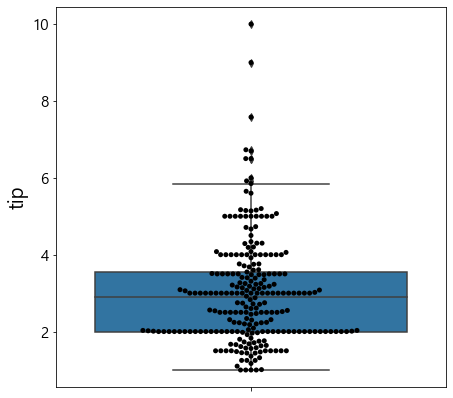

In [51]:
plt.figure(figsize=(7,7))

sns.boxplot(y='tip', data=tips)
sns.swarmplot(y='tip', data=tips, color='black')

plt.show()

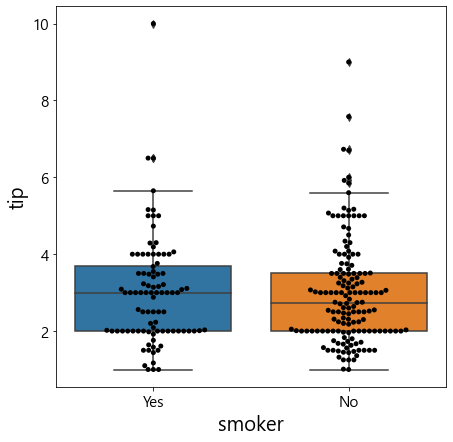

In [54]:
plt.figure(figsize=(7,7))

sns.boxplot(x='smoker', y='tip', data=tips)
sns.swarmplot(x='smoker', y='tip', data=tips, color='black')

plt.show()

### countplot() 
- 막대그래프(bar plot)을 그리는 함수
- 범주형 변수의 고유값의 개수를 표시
- matplotlib의 bar()

<BarContainer object of 4 artists>

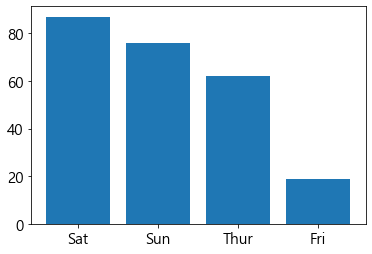

In [62]:
plt.bar(tips['day'].value_counts().index, tips['day'].value_counts())

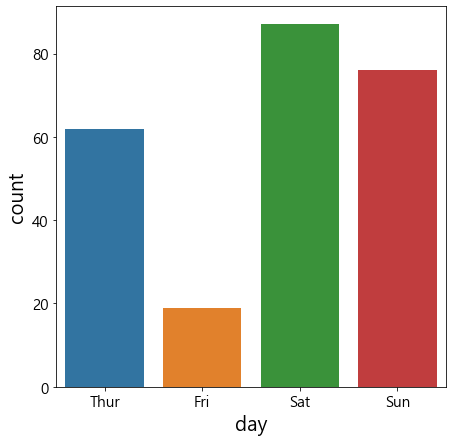

In [64]:
plt.figure(figsize=(7,7))

# 범주형 컬럼을 지정하면 고유값별로 개수를 세서 막대그래프를 그려준다.
sns.countplot(x='day', data=tips)#, color='red')
plt.show()

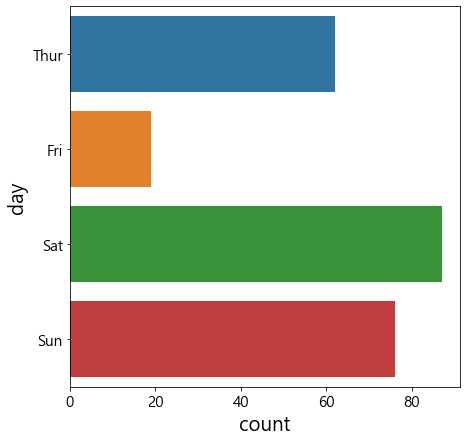

In [65]:
plt.figure(figsize=(7,7))

# 범주형 컬럼을 지정하면 고유값별로 개수를 세서 막대그래프를 그려준다.
sns.countplot(y='day', data=tips)#, color='red')
plt.show()

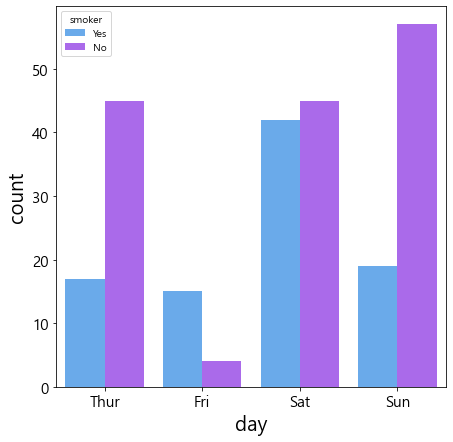

In [73]:
# 요일별-흡연여부별로 
plt.figure(figsize=(7,7))

sns.countplot(x='day', hue='smoker', data=tips, palette='cool')

plt.show()

## scatterplot, lmplot, jointplot, pairplot
- 산점도를 그린다.

### scatterplot

팔레트 - https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

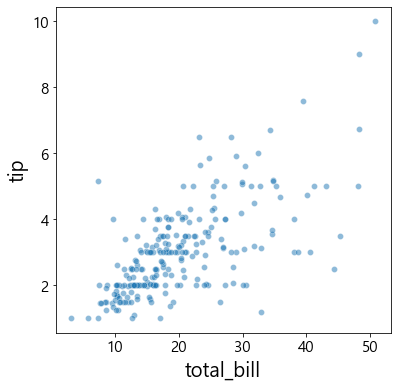

In [68]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='total_bill', y='tip', data=tips, alpha=0.5)
plt.show()

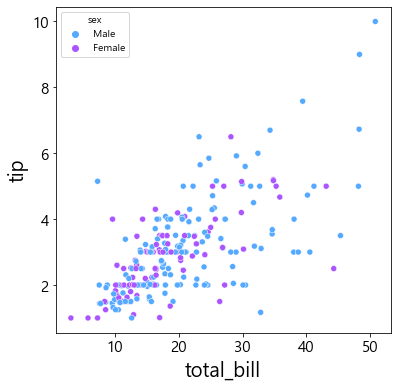

In [72]:
# 성별로 나눠서 확인
plt.figure(figsize=(6,6))
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=tips, palette='cool')  #colormap지정: matplotlib/pandas - cmap, seaborn:palette
plt.show()

### lmplot()
- 선형회귀 적합선을 포함한 산점도를 그린다.
- linear model

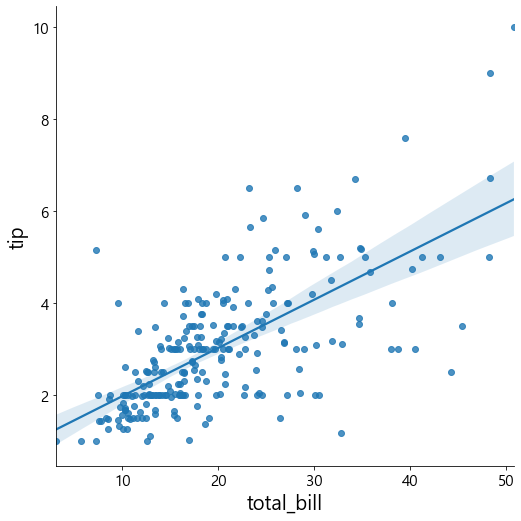

In [77]:
sns.lmplot(x='total_bill', y='tip', data=tips, height=7)
plt.show()

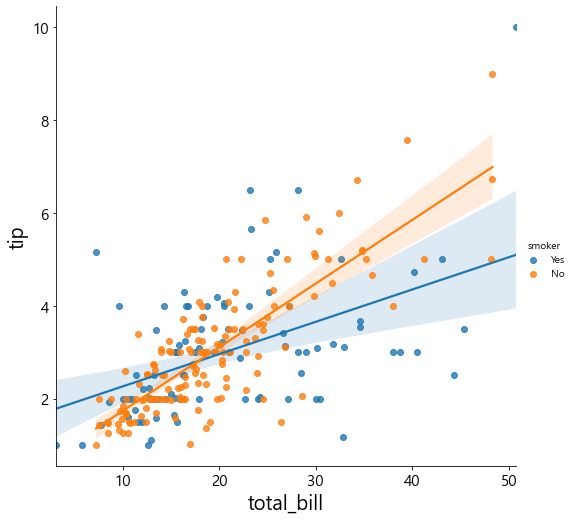

In [79]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips, height=7)
plt.show()

### jointplot()
- scatter plot 과 각 변수의 히스토그램을 같이 그린다.
- pandas **DataFrame**만 사용할 수 있다.
- DataFrame

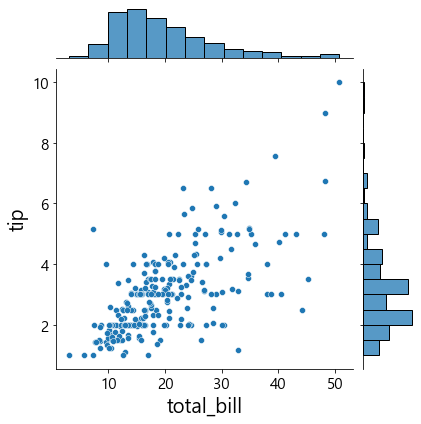

In [80]:
sns.jointplot(x='total_bill', y='tip', data=tips)
plt.show()

### paireplot
- 다변수(다차원) 데이터들 간의 산점도를 보여준다. 
- 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 변수간의 산점도를 그린다. 같은 변수가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

In [83]:
# tips.select_dtypes(include='number')

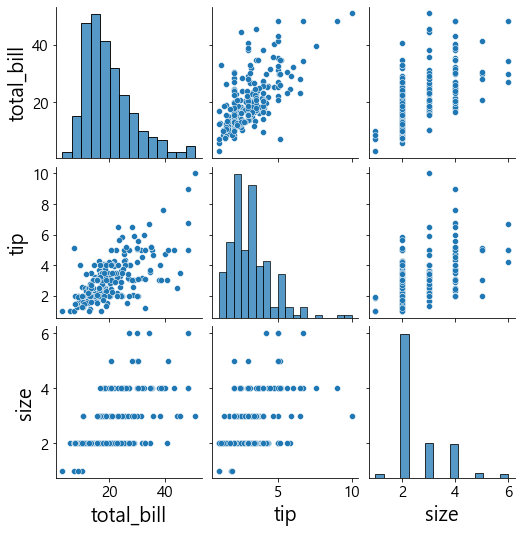

In [85]:
sns.pairplot(tips)
plt.show()

### heatmap()
- 값들에 비례해서 색깔을 다르게 해 2차원 자료로 시각화

In [86]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


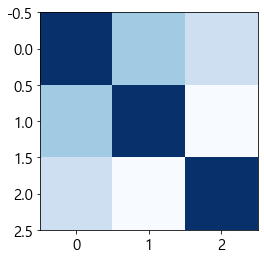

In [88]:
plt.imshow(tips.corr(), cmap='Blues')

<AxesSubplot:>

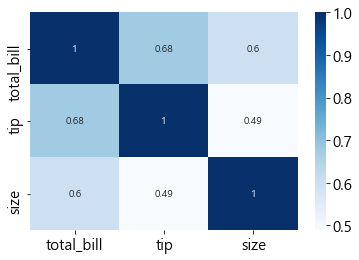

In [92]:
sns.heatmap(tips.corr(), annot=True, cmap='Blues')

### lineplot
- 선그래프
- 시간의 흐름에 따른 값의 변화를 보여주는데 유용하다. (시계열 데이터)

In [93]:
index = pd.date_range('2021/1/1', freq='D', periods=10)
value = np.random.randint(1,100, size=(10,3))
df = pd.DataFrame(value, index=index, columns=list('ABC'))
df.head(3)

,A,B,C
2021-01-01,56,89,86
2021-01-02,39,59,79
2021-01-03,96,31,42


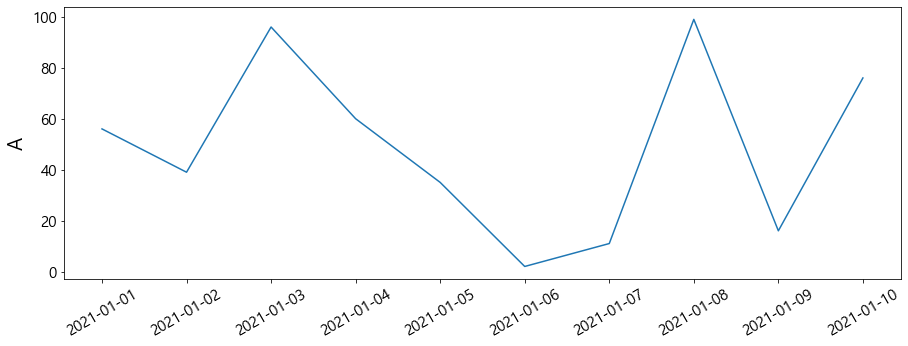

In [98]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df.index, y="A", data=df)
plt.xticks(df.index, rotation=30)
plt.show()

<AxesSubplot:xlabel='index', ylabel='A'>

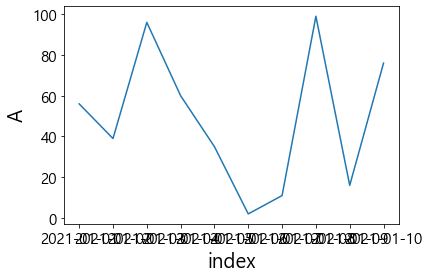

In [100]:
df2 = df.reset_index()
sns.lineplot(x='index', y='A', data=df2)